<h1 style="font-size:3rem;color:orange;">Homework 3</h1>

# Problem 2

### 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data. 

(a) Generate a simulated data set with 20 observations in each of three classes (i.e., 60 observations total), and 50 variables. Hint: There are several functions in R that you can use to generate data. One example is the rnorm() function; runif() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes. 

In [28]:
#%% Genereating a simulated data set with 60 observations

import pandas as pd
import numpy as np

#creates 50 columns
col = [1]*50
#randomly generates 20 normalized rows per column
arrays_1 = [np.random.normal(loc=0, scale=c, size=(20)) for c in col]
#creates dataframe from numpy arrays
df_1 = pd.DataFrame.from_dict(arrays_1)
#transposes to create a 20 observation/row 50 variable/column dataframe
#adds a classifier column to identify what class observation it is from
listtype = ['class_1']*20
dftype = pd.DataFrame(listtype).transpose()
#add to original dataframe
df_1 = pd.concat([df_1,dftype])
#transposes to create a 20 observation 50 variable dataframe
df_1 = df_1.transpose()
print("Head of DataFrame 1:\n",df_1.head(),"\nShape:",df_1.shape)
del arrays_1, listtype, dftype
#repeat 2 times with different meanshifts/loc
arrays_2 = [np.random.normal(loc=0.7, scale=c, size=(20)) for c in col]
df_2 = pd.DataFrame.from_dict(arrays_2)

listtype = ['class_2']*20
dftype = pd.DataFrame(listtype).transpose()
df_2 = pd.concat([df_2,dftype])
df_2 = df_2.transpose()
print("Head of DataFrame 2:\n",df_2.head(),"\nShape:",df_2.shape)
del arrays_2, listtype, dftype
arrays_3 = [np.random.normal(loc=1.4, scale=c, size=(20)) for c in col]
df_3 = pd.DataFrame.from_dict(arrays_3)

listtype = ['class_3']*20
dftype = pd.DataFrame(listtype).transpose()
df_3 = pd.concat([df_3,dftype])
df_3 = df_3.transpose()
print("Head of DataFrame 3:\n",df_3.head(),"\nShape:",df_3.shape)
del arrays_3, listtype, dftype

df = pd.concat([df_1,df_2,df_3]).reset_index(drop=True)
df = df.set_axis([*df.columns[:-1], 'observation'], axis=1, inplace=False)

print("Head of X:\n",df.head(),"\nShape:",df.shape)
del df_1, df_2, df_3, col

Head of DataFrame 1:
          0         1         2         3         4         5         6   \
0 -0.046741  2.014021  1.624853  -0.52038 -0.383157  0.004045 -0.542218   
1  0.348215 -1.638005 -0.423099  0.338112  1.899693  0.296986 -0.004129   
2 -0.126225  0.068778  0.518311  0.868168  0.022857  0.233042  2.669853   
3  1.791834  2.349753   1.21318  0.348062 -0.236852 -0.544592  1.007884   
4  0.589848  1.122629  0.328796 -1.141019   0.94302 -0.778264  1.028219   

         7         8         9   ...        41        42        43        44  \
0 -0.457654   1.16644 -0.419229  ...  0.290762  0.705153 -0.765765  0.339847   
1 -0.440813 -0.232753  0.276957  ...  0.694805  0.900209  1.934013  1.327063   
2  1.314419  0.629228  1.335013  ...  1.542554  0.817948  -1.80135  0.673176   
3  0.237882 -0.635815 -0.405539  ... -0.606356  0.242795  0.564811  0.348057   
4 -0.018781  0.757675  -0.40887  ... -1.163415  -2.23992 -1.310834  -0.15553   

         45        46        47        48     

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors. 

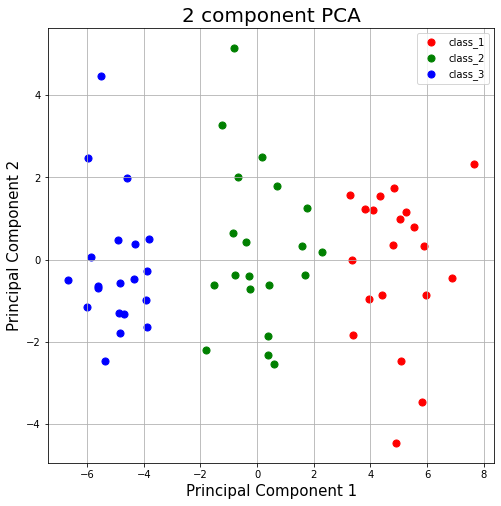

In [29]:
#%% Perform PCA on the 60 observations and plot

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#separating out the features
X = df.iloc[: , :50]

#separating out the target
y = df.loc[:,['observation']].values

pca = PCA(n_components=50)

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(principalComponents)

finalDf = pd.concat([principalDf, df[['observation']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['class_1', 'class_2', 'class_3']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['observation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

del principalComponents, ax, color, colors, fig, indicesToKeep, pca, principalDf, target, targets

(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compared to the true class labels? Hint: You can use the table() function in R to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same. 

In [37]:
#%% Perfrom K-means clustering k=3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
true_class = np.array(['0']*20 + ['1']*20 + ['2']*20, dtype=int)
cluster = kmeans.labels_
print("cluster\n",cluster,"\n")
tab = pd.crosstab(cluster, true_class, rownames = ['cluster'], colnames = ['true_class']);
print(tab)
del kmeans, true_class, cluster, tab

cluster
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

true_class   0   1   2
cluster               
0            0  20   0
1            0   0  20
2           20   0   0


<b style="font-size:1.5rem;color:red;">All are perfectly clustered.</b>

(d) Perform K-means clustering with K = 2. Describe your results. 

In [38]:
#%% Perfrom K-means clustering k=2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
true_class = np.array(['0']*20 + ['1']*20 + ['2']*20, dtype=int)
cluster = kmeans.labels_
print("cluster\n",cluster,"\n")
tab = pd.crosstab(cluster, true_class, rownames = ['cluster'], colnames = ['true_class']);
print(tab)
del kmeans, true_class, cluster, tab

cluster
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

true_class   0   1   2
cluster               
0            0  10  20
1           20  10   0


<b style="font-size:1.5rem;color:red;">The middle, class_2, is forced into the wrong class while the ends, class_1 and class_3, are correctly classified as extremes.</b>

(e) Now perform K-means clustering with K = 4 and describe your results. 

In [39]:
#%% Perfrom K-means clustering k=4
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
true_class = np.array(['0']*20 + ['1']*20 + ['2']*20, dtype=int)
cluster = kmeans.labels_
print("cluster\n",cluster,"\n")
tab = pd.crosstab(cluster, true_class, rownames = ['cluster'], colnames = ['true_class']);
print(tab)
del kmeans, true_class, cluster, tab

cluster
 [0 3 1 3 0 3 3 0 3 3 3 0 3 3 0 0 0 3 3 3 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

true_class   0   1   2
cluster               
0            7   0   0
1            1  19   0
2            0   1  20
3           12   0   0


<b style="font-size:1.5rem;color:red;">One of the classes, class_1, is split between 3 classes, class_3 is correctly classified, class_2 is nearly correctly classified.</b>

(f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [40]:
#%% Perform K-means clustering on principal component score vectors.
from sklearn.cluster import KMeans

princ2 = finalDf.iloc[: , :2]
kmeans = KMeans(n_clusters=3, random_state=0).fit(princ2)
true_class = np.array(['0']*20 + ['1']*20 + ['2']*20, dtype=int)
cluster = kmeans.labels_
print("cluster\n",cluster,"\n")
tab = pd.crosstab(cluster, true_class, rownames = ['cluster'], colnames = ['true_class']);
print(tab)
del kmeans, true_class, cluster, tab, princ2

cluster
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

true_class   0   1   2
cluster               
0            0   0  20
1            0  20   0
2           20   0   0


<b style="font-size:1.5rem;color:red;">All are perfectly clustered, the PCA carries requisite information.</b>

(g) Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [41]:
#%%  Perform K-means clustering after scaling each variable
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(scale(X))
true_class = np.array(['0']*20 + ['1']*20 + ['2']*20, dtype=int)
cluster = kmeans.labels_
print(cluster,"\n")
tab = pd.crosstab(cluster, true_class, rownames = ['cluster'], colnames = ['true_class']);
print(tab)
del kmeans, true_class, cluster, tab

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

true_class   0   1   2
cluster               
0            0  20   0
1            0   0  20
2           20   0   0


<b style="font-size:1.5rem;color:red;">Same result as in part (b), scaling does not change the results as the original data was normalized to begin with.</b>